In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
df = pd.read_csv("data/spotify_dataset.csv")

df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'data/spotify_dataset.csv'

In [3]:
import os
print(os.getcwd())


C:\Users\jo_te


In [4]:
import os
os.chdir(r"C:\Users\jo_te\Desktop\spotify-genre-segmentation")
print(os.getcwd())  # to confirm


C:\Users\jo_te\Desktop\spotify-genre-segmentation


In [5]:
import pandas as pd
df = pd.read_csv("data/spotify_dataset.csv")


In [6]:

print(df.shape)
print(df.info())

df.describe()


(32833, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [7]:
df = df.dropna()
features = df.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [9]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters


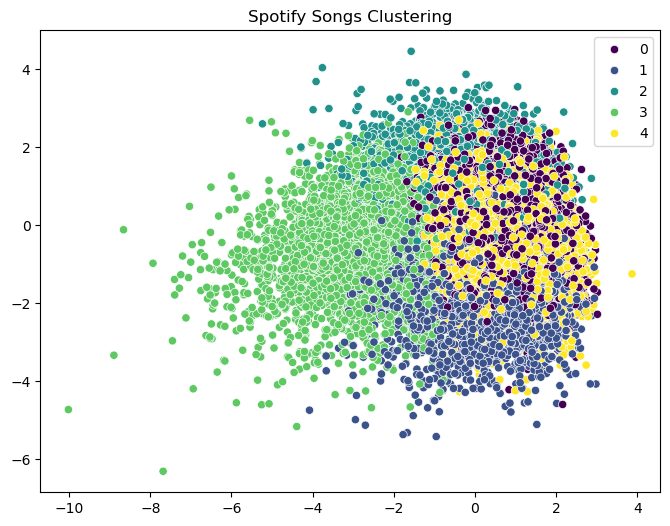

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette="viridis")
plt.title("Spotify Songs Clustering")
plt.show()


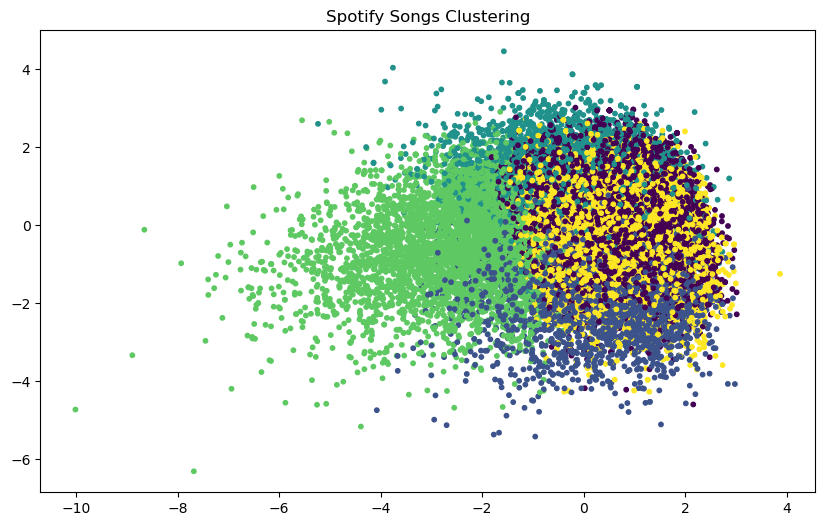

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis', s=10)
plt.title("Spotify Songs Clustering")
plt.savefig("spotify_clustering.png", dpi=300, bbox_inches='tight') 
plt.savefig("spotify_clustering.pdf", bbox_inches='tight')          

plt.show()


In [12]:
import pandas as pd
df['cluster'] = clusters
df.to_csv("spotify_clustering_results.csv", index=False)
print("✅ Clustering results saved as spotify_clustering_results.csv")


✅ Clustering results saved as spotify_clustering_results.csv


In [13]:
import joblib
joblib.dump(kmeans, "spotify_kmeans_model.pkl")

['spotify_kmeans_model.pkl']